In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales1 = pd.read_csv('sales1.csv')
sales2 = pd.read_csv('sales2.csv')
sales3 = pd.read_csv('sales3.csv')
sales4 = pd.read_csv('sales4.csv')
sales5 = pd.read_csv('sales5.csv')


In [4]:
print(sales1.columns)
print(sales2.columns)

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'F

In [5]:
df = pd.concat([sales1,sales2,sales3,sales4,sales5], axis=0)
    

In [6]:
sales1.shape

(321, 27)

In [7]:
df['PRICE'].max()

5850000.0

In [8]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [9]:
col_to_drop = ['SALE TYPE','ADDRESS','CITY','SOLD DATE','STATE OR PROVINCE','ZIP OR POSTAL CODE','LOCATION','STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED']

In [10]:
df_dropcol = df.drop(columns=col_to_drop, inplace=False)

In [11]:
df_dropcol.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Vacant Land,399900.0,NaN,NaN,NaN,303744.0,NaN,NaN,NaN,NaN,38.622144,-90.731973
1,Single Family Residential,NaN,3.0,2.5,2192.0,14375.0,1982.0,NaN,NaN,NaN,38.633559,-90.577637
2,Condo/Co-op,325000.0,3.0,2.0,2400.0,NaN,1982.0,NaN,135.0,NaN,38.629945,-90.696285
3,Single Family Residential,438000.0,2.0,2.5,1674.0,2614.0,1996.0,NaN,262.0,465.0,38.663775,-90.584643
4,Single Family Residential,437000.0,3.0,3.0,2014.0,21780.0,1984.0,NaN,217.0,NaN,38.614967,-90.611794


#### Finding types of properties sold in the last 5 years in zip code 63005

In [12]:
df_dropcol['PROPERTY TYPE'].unique()

array(['Vacant Land', 'Single Family Residential', 'Condo/Co-op'],
      dtype=object)

In [13]:
df_dropcol.isnull().sum()

PROPERTY TYPE        0
PRICE                7
BEDS                49
BATHS               54
SQUARE FEET         51
LOT SIZE            39
YEAR BUILT         155
DAYS ON MARKET    1603
$/SQUARE FEET       58
HOA/MONTH          497
LATITUDE             0
LONGITUDE            0
dtype: int64

#### Percent missing values

In [14]:
#percent_missing in each column
percent = df_dropcol.isnull().sum() * 100 / len(df_dropcol)
missing_value_percent = pd.DataFrame({'column_name': df_dropcol.columns, 'percent_missing': percent})
#print(missing_value_percent.max())


In [15]:
len(df_dropcol)

1603

In [16]:
df_dropcol['YEAR BUILT'].isnull().sum() * 100 / len(df_dropcol)

9.669369931378665

In [17]:
percent

PROPERTY TYPE       0.000000
PRICE               0.436681
BEDS                3.056769
BATHS               3.368684
SQUARE FEET         3.181535
LOT SIZE            2.432938
YEAR BUILT          9.669370
DAYS ON MARKET    100.000000
$/SQUARE FEET       3.618216
HOA/MONTH          31.004367
LATITUDE            0.000000
LONGITUDE           0.000000
dtype: float64

In [18]:
missing_value_percent

,column_name,percent_missing
PROPERTY TYPE,PROPERTY TYPE,0.000000
PRICE,PRICE,0.436681
BEDS,BEDS,3.056769
BATHS,BATHS,3.368684
SQUARE FEET,SQUARE FEET,3.181535
LOT SIZE,LOT SIZE,2.432938
YEAR BUILT,YEAR BUILT,9.669370
DAYS ON MARKET,DAYS ON MARKET,100.000000
$/SQUARE FEET,$/SQUARE FEET,3.618216
HOA/MONTH,HOA/MONTH,31.004367


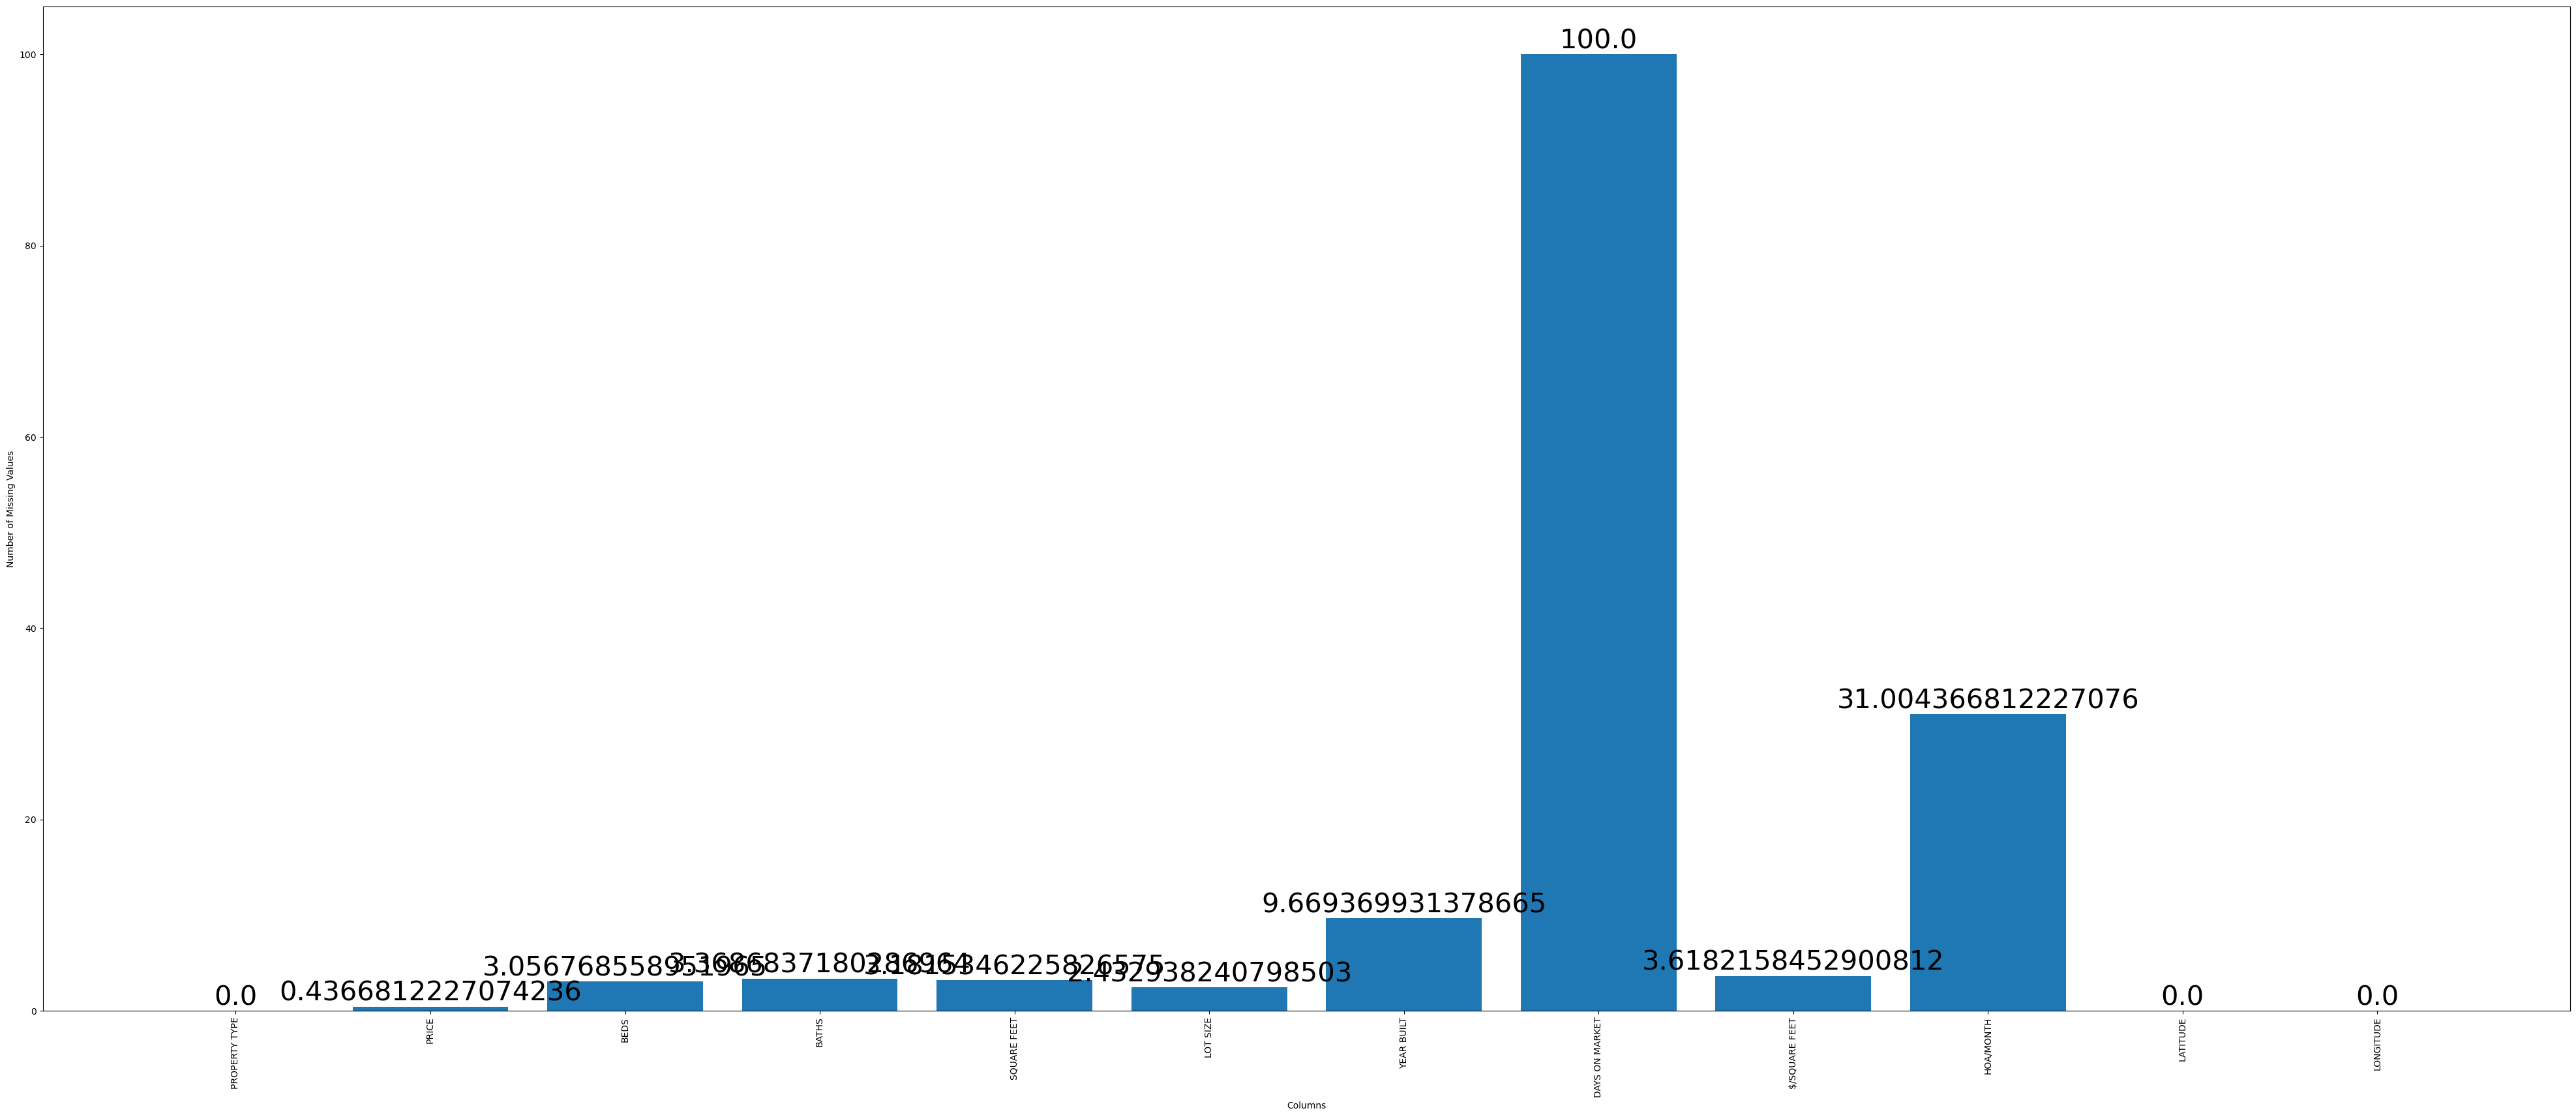

In [19]:
plt.figure(figsize=(50, 20))
plt.bar(missing_value_percent.index,percent)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
for i, v in enumerate(percent):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=30)

In [20]:
#dropping 'DAYS ON MARLET' column since it has 100% missing values
df_dropcol = df_dropcol.drop(columns='DAYS ON MARKET')

In [21]:
df_dropcol.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Vacant Land,399900.0,NaN,NaN,NaN,303744.0,NaN,NaN,NaN,38.622144,-90.731973
1,Single Family Residential,NaN,3.0,2.5,2192.0,14375.0,1982.0,NaN,NaN,38.633559,-90.577637
2,Condo/Co-op,325000.0,3.0,2.0,2400.0,NaN,1982.0,135.0,NaN,38.629945,-90.696285
3,Single Family Residential,438000.0,2.0,2.5,1674.0,2614.0,1996.0,262.0,465.0,38.663775,-90.584643
4,Single Family Residential,437000.0,3.0,3.0,2014.0,21780.0,1984.0,217.0,NaN,38.614967,-90.611794


In [22]:
#investigate colmn price and see what other columns have missing values
rows_with_nan = df_dropcol[df_dropcol['PRICE'].isnull()]

In [23]:
rows_with_nan

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
1,Single Family Residential,NaN,3.0,2.5,2192.0,14375.0,1982.0,NaN,NaN,38.633559,-90.577637
83,Condo/Co-op,NaN,4.0,3.5,2972.0,7405.0,1999.0,NaN,NaN,38.656969,-90.582148
117,Single Family Residential,NaN,3.0,3.0,2192.0,27878.0,1986.0,NaN,NaN,38.641406,-90.573127
333,Single Family Residential,NaN,4.0,4.5,3114.0,12632.0,1990.0,NaN,NaN,38.642207,-90.576861
127,Single Family Residential,NaN,4.0,4.5,4398.0,73616.0,2004.0,NaN,NaN,38.642570,-90.677694
208,Single Family Residential,NaN,4.0,3.5,2675.0,131987.0,1978.0,NaN,NaN,38.638238,-90.596552
310,Single Family Residential,NaN,4.0,5.0,5690.0,15028.0,2008.0,NaN,NaN,38.655130,-90.577027


#### these rows have price, square feet of the single family home,HOA and location  missing which makes it difficult handle missing information, so it is better to drop these rows.

In [24]:
df_dropcol = df_dropcol.dropna(subset=['PRICE'])

In [25]:
df_dropcol.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Vacant Land,399900.0,NaN,NaN,NaN,303744.0,NaN,NaN,NaN,38.622144,-90.731973
2,Condo/Co-op,325000.0,3.0,2.0,2400.0,NaN,1982.0,135.0,NaN,38.629945,-90.696285
3,Single Family Residential,438000.0,2.0,2.5,1674.0,2614.0,1996.0,262.0,465.0,38.663775,-90.584643
4,Single Family Residential,437000.0,3.0,3.0,2014.0,21780.0,1984.0,217.0,NaN,38.614967,-90.611794
5,Single Family Residential,500000.0,4.0,2.0,2382.0,118048.0,1978.0,210.0,NaN,38.657778,-90.631614


In [26]:
# Imputing values for the missing columns
median = df_dropcol['SQUARE FEET'].median()

In [27]:
df_dropcol['SQUARE FEET'].fillna(median, inplace=True)

In [28]:
mean = df_dropcol['HOA/MONTH'].mean()

In [29]:
mean

88.2622061482821

In [30]:
df_dropcol['HOA/MONTH'].fillna(mean, inplace=True)


In [31]:
import math

In [32]:
df_dropcol['$/SQUARE FEET'] = np.where(df_dropcol['$/SQUARE FEET'].isna(),
                                       df_dropcol['PRICE'] / df_dropcol['SQUARE FEET'],
                                       df_dropcol['$/SQUARE FEET'].round(0))


In [33]:
df_dropcol['$/SQUARE FEET'] = np.where(df_dropcol['$/SQUARE FEET'].isna(),
                                       df_dropcol['PRICE'] / df_dropcol['SQUARE FEET'],
                                       df_dropcol['$/SQUARE FEET'].apply(math.floor))

In [34]:
df_dropcol['YEAR BUILT'] = df_dropcol['YEAR BUILT'].fillna(0)

In [35]:
df_dropcol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 337
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  1596 non-null   object 
 1   PRICE          1596 non-null   float64
 2   BEDS           1547 non-null   float64
 3   BATHS          1542 non-null   float64
 4   SQUARE FEET    1596 non-null   float64
 5   LOT SIZE       1557 non-null   float64
 6   YEAR BUILT     1596 non-null   float64
 7   $/SQUARE FEET  1596 non-null   float64
 8   HOA/MONTH      1596 non-null   float64
 9   LATITUDE       1596 non-null   float64
 10  LONGITUDE      1596 non-null   float64
dtypes: float64(10), object(1)
memory usage: 149.6+ KB


In [36]:
df_dropcol['LOT SIZE'] = df_dropcol['LOT SIZE'].fillna(0)

In [37]:
df_dropcol['BEDS'] = df_dropcol['BEDS'].fillna(0)

In [38]:
df_dropcol['BATHS'] = df_dropcol['BATHS'].fillna(0)

In [39]:
df_dropcol.isna().sum()

PROPERTY TYPE    0
PRICE            0
BEDS             0
BATHS            0
SQUARE FEET      0
LOT SIZE         0
YEAR BUILT       0
$/SQUARE FEET    0
HOA/MONTH        0
LATITUDE         0
LONGITUDE        0
dtype: int64

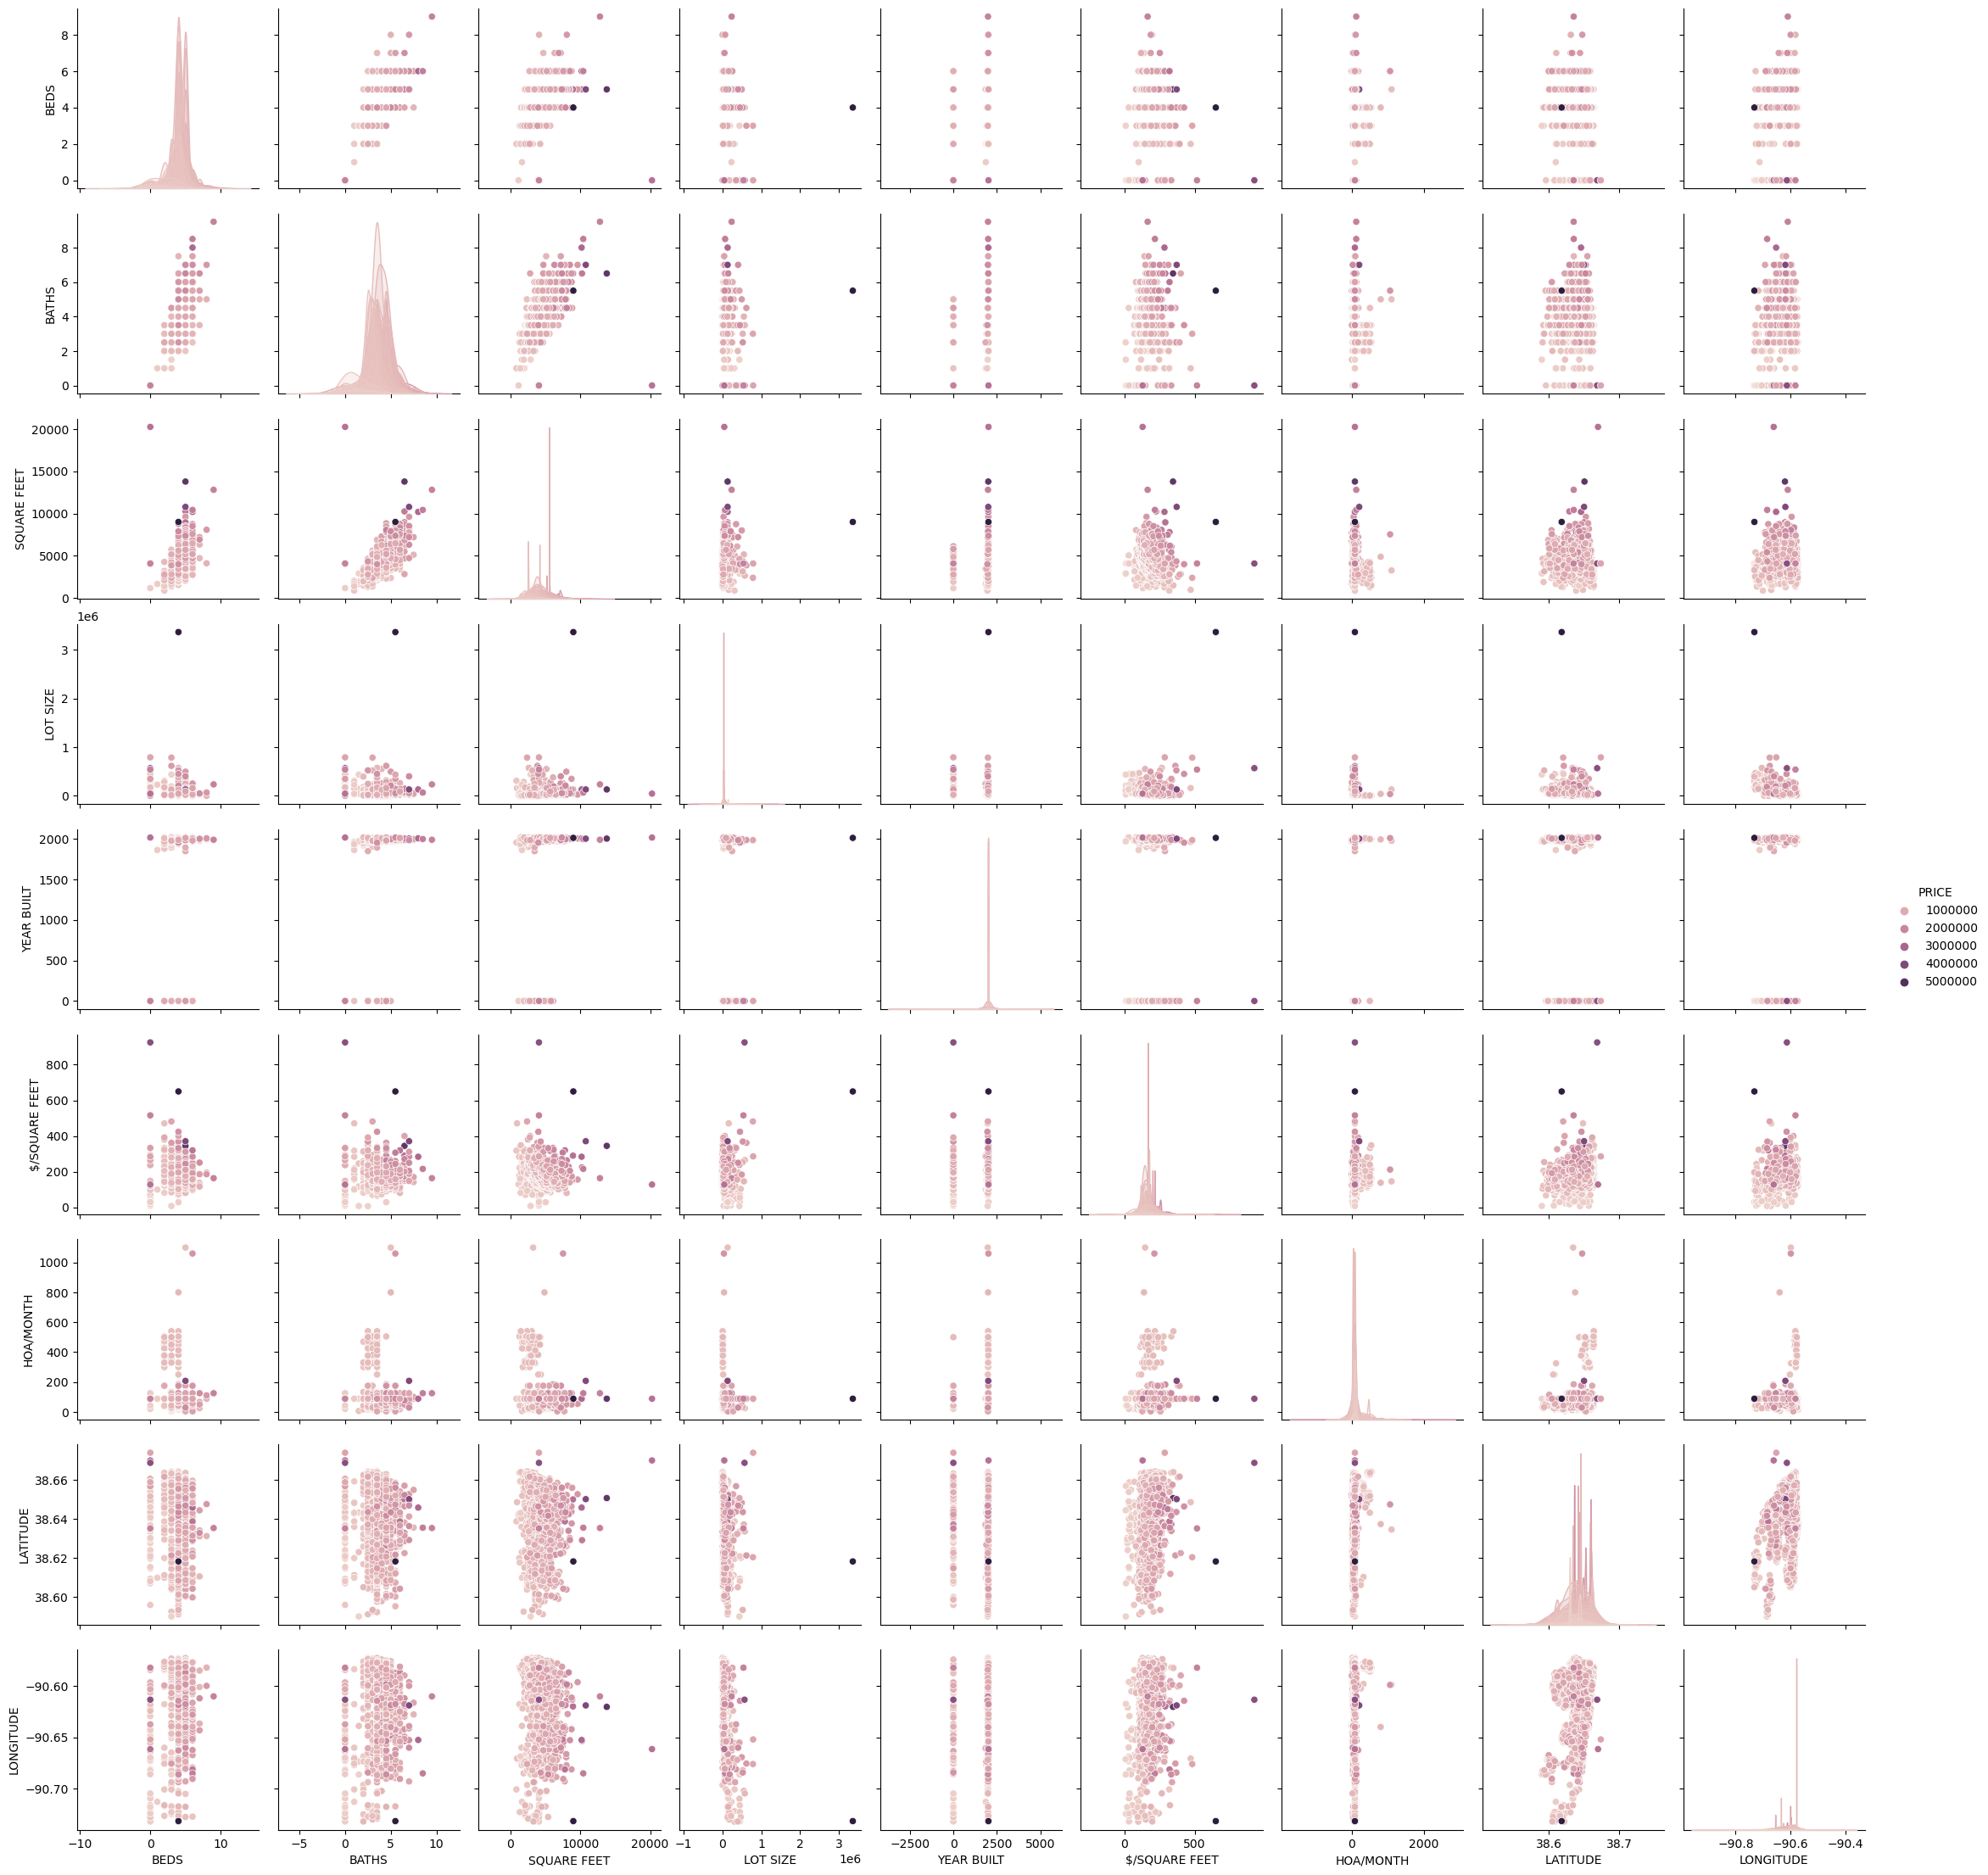

In [40]:
sns.pairplot(df_dropcol,hue='PRICE')

C:\Users\Anjana\AppData\Local\Temp\ipykernel_6088\3000670528.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dropcol.corr(),cmap='viridis')


<Axes: >

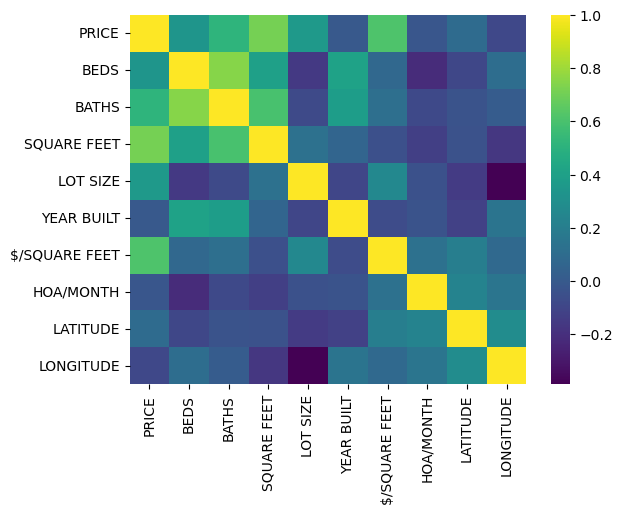

In [41]:
sns.heatmap(df_dropcol.corr(),cmap='viridis')

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

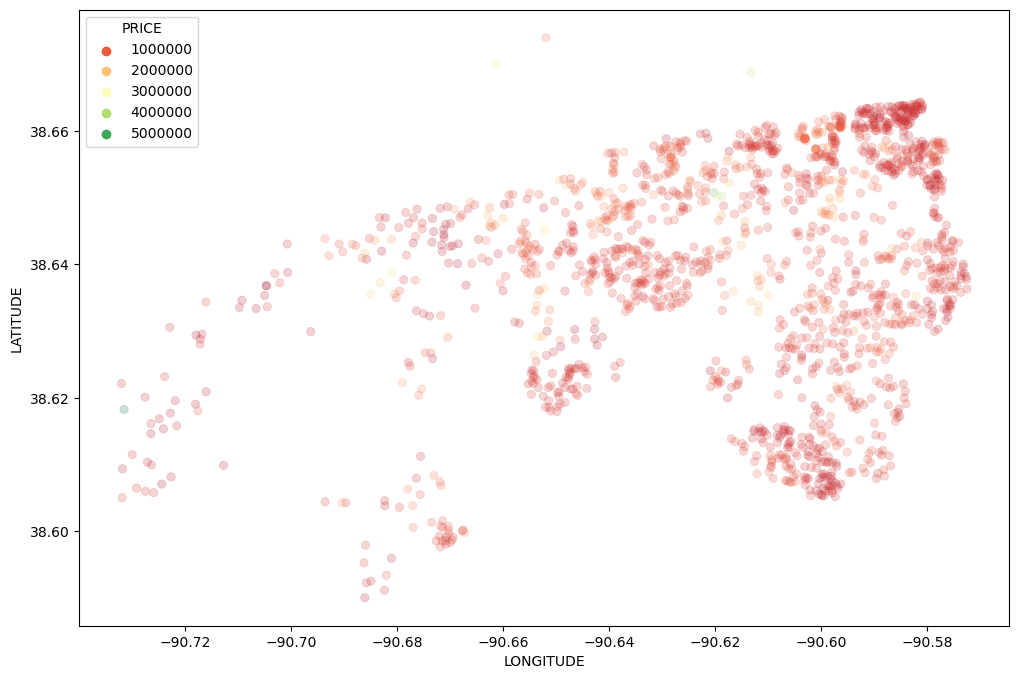

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data =df_dropcol, edgecolor = None,alpha=0.2,palette='RdYlGn',hue = 'PRICE')

In [43]:
 from sklearn.model_selection import train_test_split

In [44]:
df_dropcol.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [45]:
X = df_dropcol[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']]
y = df_dropcol['PRICE']



In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
scaler = MinMaxScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
X_test_scaled = scaler.transform(X_test)

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [54]:
lm.coef_

array([  26382.74387551,  108872.30541116, 3577542.96371284,
       1581582.19073282,  -11722.33677302, 3808108.48415747,
         33094.02311502,   26047.95889568,   56937.25578078])

In [55]:
predictions = lm.predict(X_test_scaled)

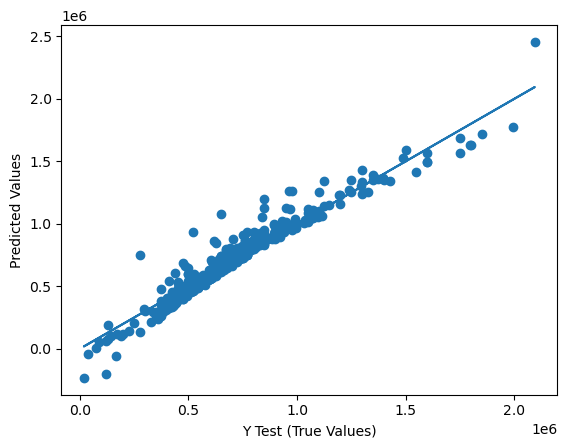

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test,y_test)

In [57]:
from sklearn import metrics

In [58]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 50837.217407067656
MSE 6312169821.4191475
RMSE 79449.1650139833


In [59]:
metrics.explained_variance_score(y_test,predictions)

0.9277446201236064

C:\Users\Anjana\AppData\Local\Temp\ipykernel_6088\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


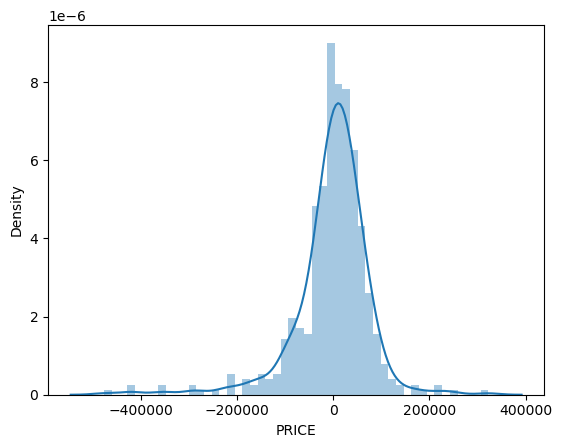

In [60]:
sns.distplot((y_test-predictions),bins=50);

In [61]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #coefficient shows increase in money spent

In [62]:
cdf

,Coeff
BEDS,2.638274e+04
BATHS,1.088723e+05
SQUARE FEET,3.577543e+06
LOT SIZE,1.581582e+06
YEAR BUILT,-1.172234e+04
$/SQUARE FEET,3.808108e+06
HOA/MONTH,3.309402e+04
LATITUDE,2.604796e+04
LONGITUDE,5.693726e+04


In [63]:
single_house = X_test.iloc[0]

In [64]:
single_house

BEDS                 4.000000
BATHS                4.000000
SQUARE FEET       5100.000000
LOT SIZE         23522.000000
YEAR BUILT        1997.000000
$/SQUARE FEET      219.000000
HOA/MONTH           88.262206
LATITUDE            38.648355
LONGITUDE          -90.635853
Name: 31, dtype: float64

In [65]:
single_house = scaler.transform(single_house.values.reshape(-1, 9))

C:\Users\Anjana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [66]:
single_house

array([[0.5       , 0.47058824, 0.21471503, 0.0069996 , 0.987636  ,
        0.23009815, 0.07688157, 0.69463006, 0.60349967]])

In [67]:
lm.predict(single_house)

array([1062736.74759379])

In [68]:
y_test[1]

1075000.0

In [69]:
df_dropcol.head()

,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,Vacant Land,399900.0,0.0,0.0,4083.0,303744.0,0.0,97.0,88.262206,38.622144,-90.731973
2,Condo/Co-op,325000.0,3.0,2.0,2400.0,0.0,1982.0,135.0,88.262206,38.629945,-90.696285
3,Single Family Residential,438000.0,2.0,2.5,1674.0,2614.0,1996.0,262.0,465.000000,38.663775,-90.584643
4,Single Family Residential,437000.0,3.0,3.0,2014.0,21780.0,1984.0,217.0,88.262206,38.614967,-90.611794
5,Single Family Residential,500000.0,4.0,2.0,2382.0,118048.0,1978.0,210.0,88.262206,38.657778,-90.631614


In [78]:
my_house = np.array([4 , 3.5, 3200, 22215, 1996, 176, 100, 38.642033, -90.647284])

In [79]:
myhousedf = pd.DataFrame(my_house)

In [80]:
my_house = scaler.transform(myhousedf.values.reshape(-1, 9))

C:\Users\Anjana\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [81]:
lm.predict(my_house)

array([519244.0108985])